In [1]:
import pandas as pd
import numpy as np
import tensorflow as TF
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
CATEGORIES = [0, 1, 2, 3, 4, 5]
EPOCHS = 50
TEST = 0.3

2025-09-10 14:34:48.069503: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def load_signs_dataset(dataDir : str): # type: ignore
    images = []
    labels = []
    for SingleCategory in CATEGORIES:
        category = os.path.join(dataDir, str(SingleCategory))
        
        for image in os.listdir(category):
            img_path = os.path.join(category, image)
            finalImage = cv2.imread(img_path)
            
            if finalImage is not None:
                img = cv2.resize(finalImage, (64, 64))
                images.append(img)
                
                labels.append(SingleCategory)
            else:
                raise Exception("Problems with the Archives")
    
    return (np.array(images), np.array(labels))
                

In [3]:
images, labels = load_signs_dataset("DataSet/archive")

X_train_orig, X_test_orig, Y_train_orig, Y_test_orig= train_test_split(
    np.array(images), np.array(labels), test_size=TEST
)

print(X_train_orig.shape)
print(Y_train_orig.shape)
print(X_test_orig.shape)
print(Y_test_orig.shape)

(865, 64, 64, 3)
(865,)
(372, 64, 64, 3)
(372,)


In [4]:
def model(input_shape):
    input_img = TF.keras.Input(shape=input_shape)
    Z1 = TF.keras.layers.Conv2D(filters=8, kernel_size=(4,4), padding="same")(input_img)
    
    A1 = TF.keras.layers.ReLU()(Z1)
    
    P1 = TF.keras.layers.MaxPool2D(pool_size=(8,8), strides=8, padding="same")(A1)
    
    Z2 = TF.keras.layers.Conv2D(filters=16, kernel_size=(2,2), strides=1, padding="same")(P1)
    
    A2 = TF.keras.layers.ReLU()(Z2)
    
    P2 = TF.keras.layers.MaxPool2D(pool_size=(4,4), strides=4, padding="same")(A2)
    
    
    F = TF.keras.layers.Flatten()(P2)
    
    outpus = TF.keras.layers.Dense(units= 6, activation="softmax")(F)
    
    model = TF.keras.Model(input_img,outpus)
    return model

In [5]:
ConvModel = model((64,64,3))
ConvModel.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
    )

Y_train_oh = TF.keras.utils.to_categorical(Y_train_orig, num_classes=6)
Y_test_oh = TF.keras.utils.to_categorical(Y_test_orig, num_classes=6)
history = ConvModel.fit(X_train_orig/255.0, Y_train_oh, epochs=EPOCHS, validation_data=(X_test_orig/255.0, Y_test_oh))
ConvModel.summary()


Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.1708 - loss: 1.8047 - val_accuracy: 0.1747 - val_loss: 1.7903
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1998 - loss: 1.7812 - val_accuracy: 0.2339 - val_loss: 1.7762
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.2630 - loss: 1.7715 - val_accuracy: 0.2984 - val_loss: 1.7633
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3397 - loss: 1.7531 - val_accuracy: 0.3925 - val_loss: 1.7355
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3224 - loss: 1.7232 - val_accuracy: 0.3522 - val_loss: 1.7063
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.3785 - loss: 1.6748 - val_accuracy: 0.4758 - val_loss: 1.6328
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5400 - loss: 1.5982 - val_accuracy: 0.5591 - val_loss: 1.5528
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6271 - loss: 1.4999 - val_accuracy: 0.6022 - v

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 8)      │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,932 (15.36 KB)

 Trainable params: 1,310 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,622 (10.25 KB)

In [100]:
train_loss, train_accuracy = ConvModel.evaluate(X_train_orig, Y_train_oh)
test_loss, test_accuracy = ConvModel.evaluate(X_test_orig, Y_test_oh)


print(f"Accuracy of the training: {train_accuracy}")
print(f"Accuracy of the testing: {test_accuracy}")


if test_accuracy >= 0.95:
    ConvModel.save("HandDetector.h5")
    
    

12/12 [==============================] - 0s 11ms/step - loss: 39.9069 - accuracy: 0.8468
Accuracy of the training: 0.9040462374687195
Accuracy of the testing: 0.8467742204666138


C:\Users\wedell\AppData\Local\Temp\ipykernel_16724\974158325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\wedell\AppData\Local\Temp\ipykernel_16724\974158325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

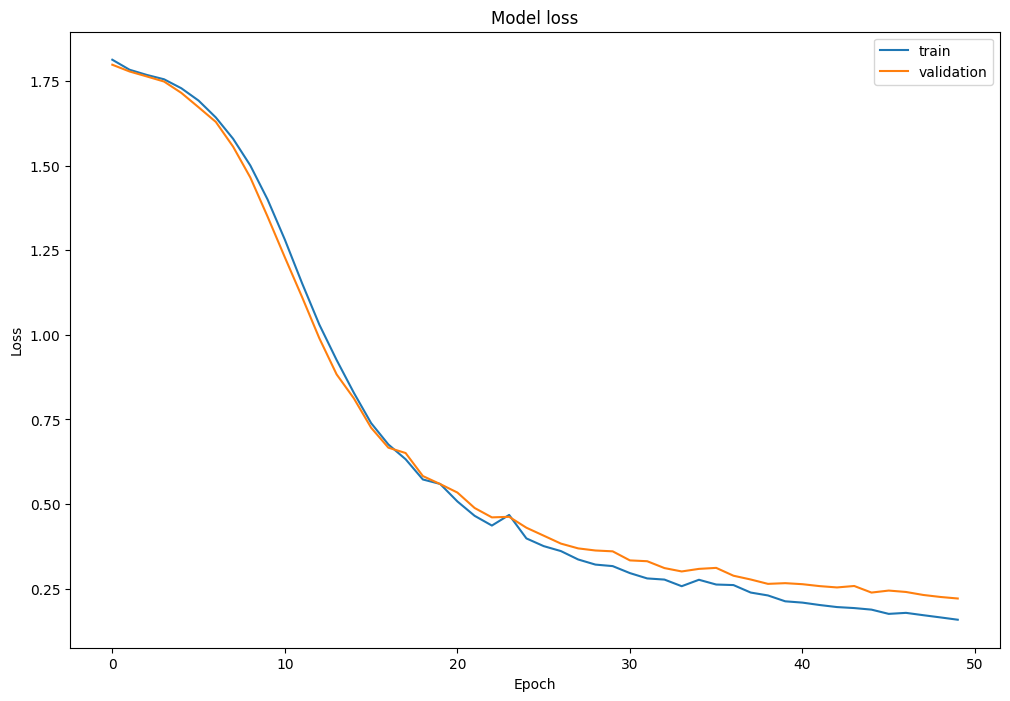

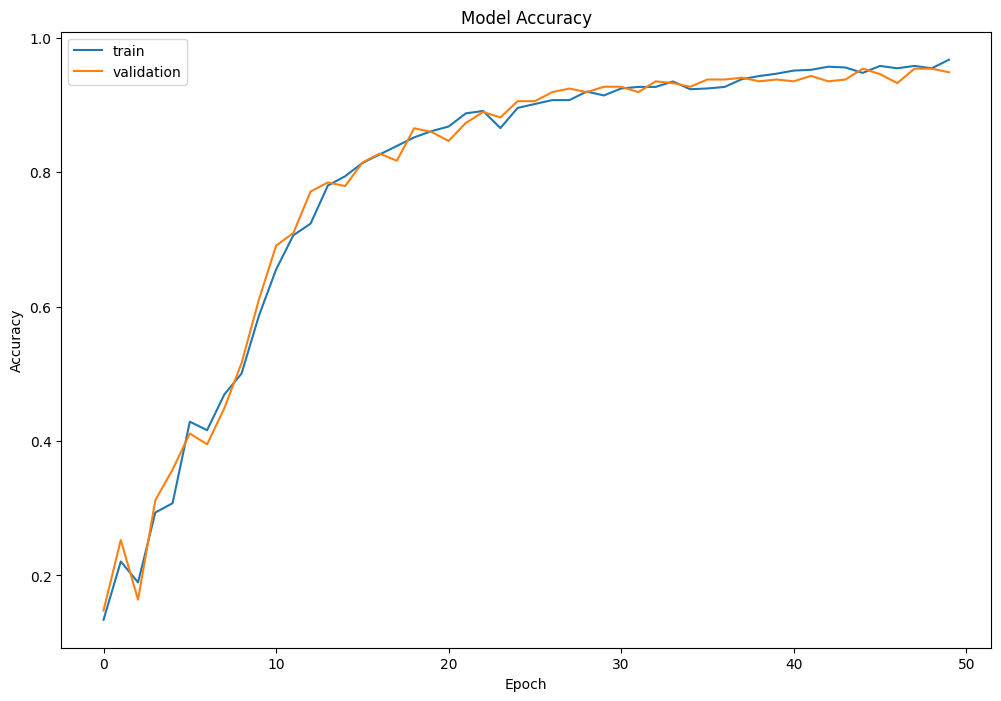

In [90]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')